In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
import seaborn as sns
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>0]

In [4]:
feature_with_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

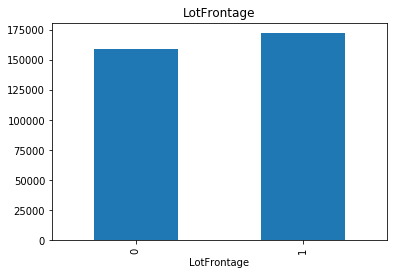

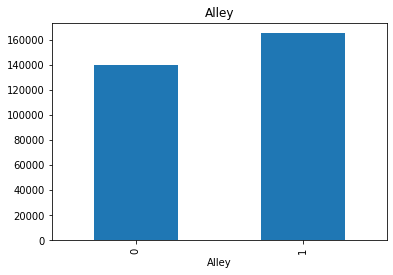

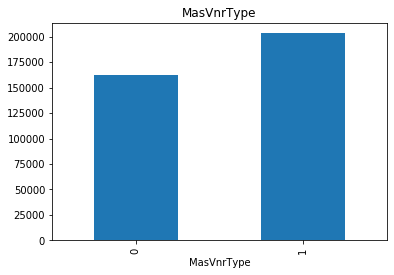

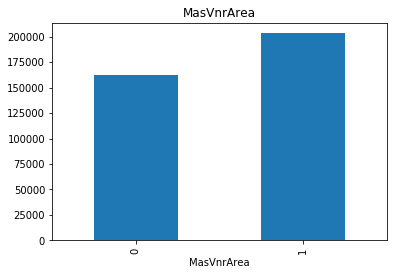

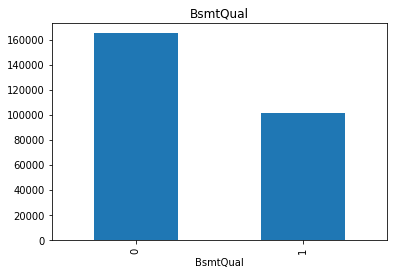

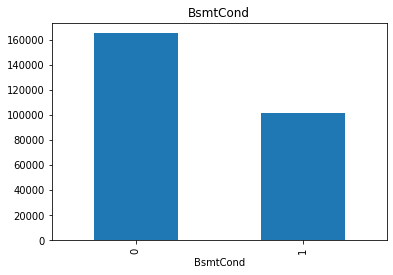

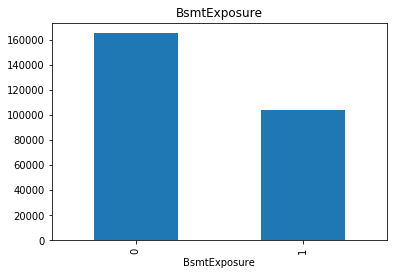

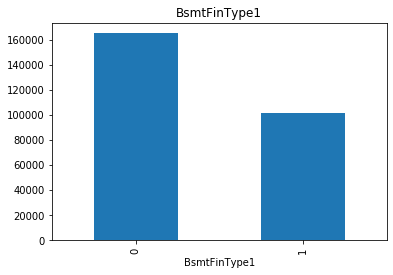

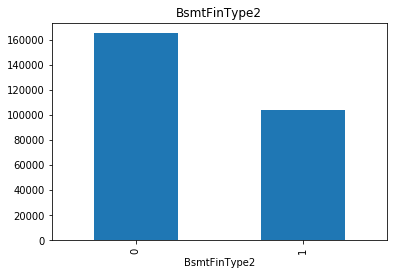

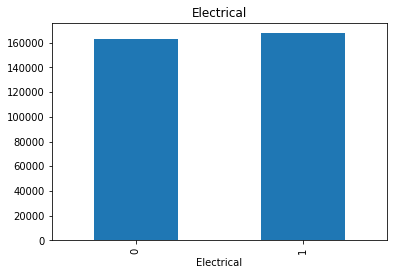

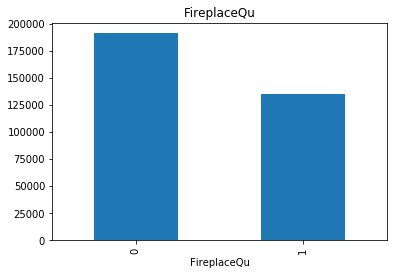

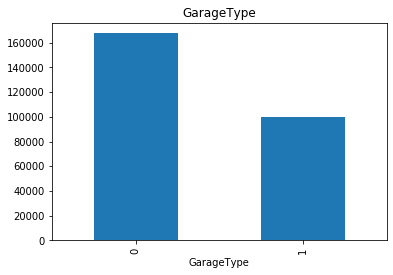

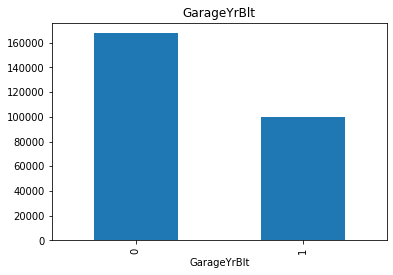

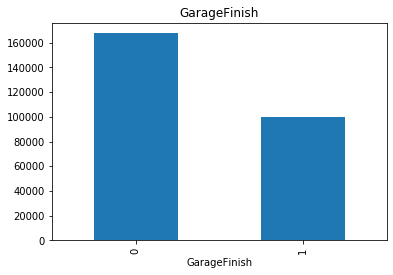

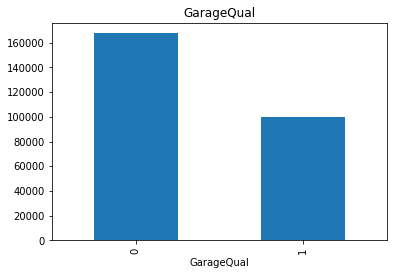

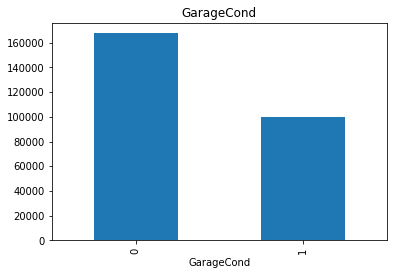

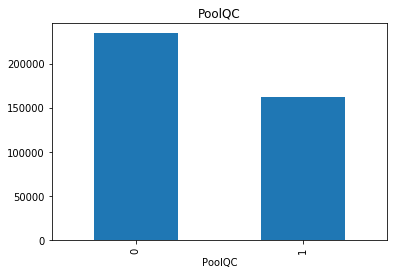

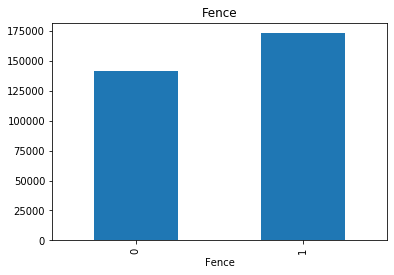

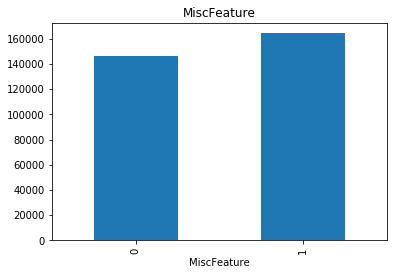

In [5]:
# find out whether null values records has impact on sale value
for feat in feature_with_na:
    data = df.copy()
    data[feat] = np.where(data[feat].isnull(),1,0)
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.show()

In [32]:
#get categorical feature with missong values
cat_feature = [feature for feature in df.columns if(df[feature].dtypes=='O')]# and df[feature].isnull().sum()>0)]

In [8]:
#get percentage of missing values in feature
for feat in cat_feature:
    data=df.copy()
    data[feat] = np.where(data[feat].isnull(),1,0)
    print("{}, missing values are {}%".format(feat,np.round(data[feat].mean(),4)))

Alley, missing values are 0.9377%
MasVnrType, missing values are 0.0055%
BsmtQual, missing values are 0.0253%
BsmtCond, missing values are 0.0253%
BsmtExposure, missing values are 0.026%
BsmtFinType1, missing values are 0.0253%
BsmtFinType2, missing values are 0.026%
Electrical, missing values are 0.0007%
FireplaceQu, missing values are 0.4726%
GarageType, missing values are 0.0555%
GarageFinish, missing values are 0.0555%
GarageQual, missing values are 0.0555%
GarageCond, missing values are 0.0555%
PoolQC, missing values are 0.9952%
Fence, missing values are 0.8075%
MiscFeature, missing values are 0.963%


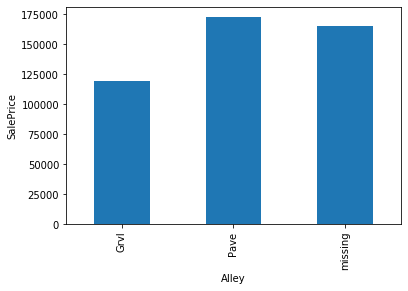

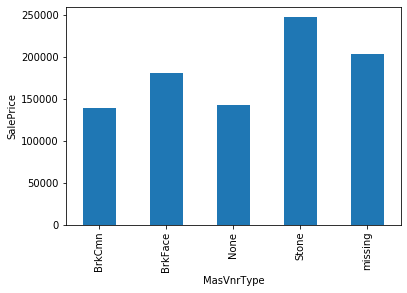

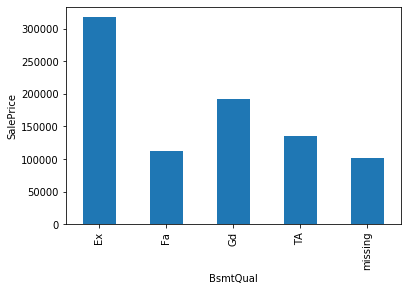

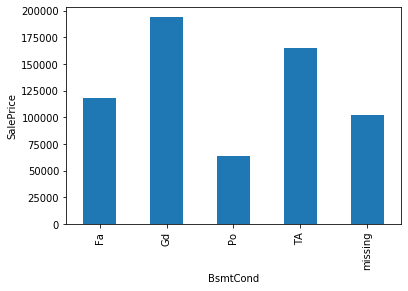

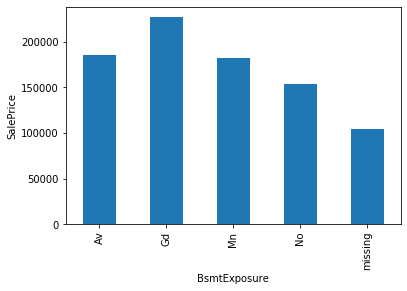

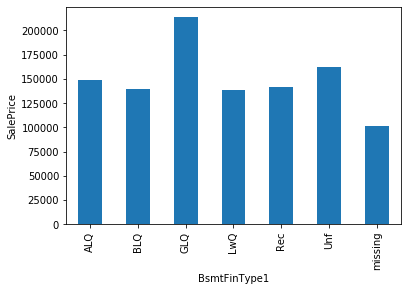

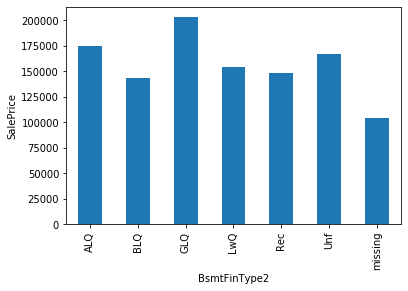

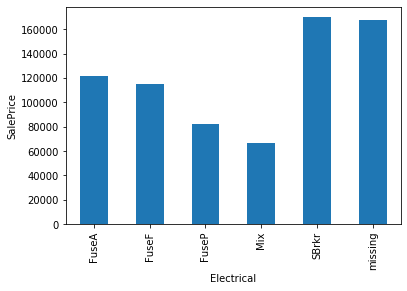

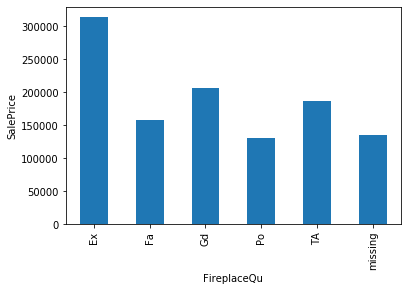

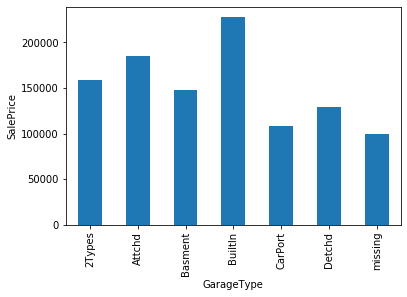

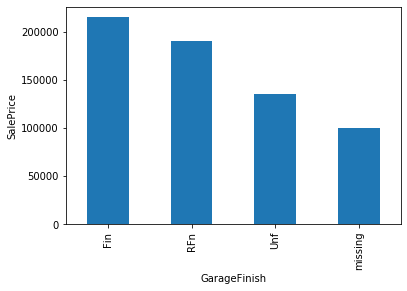

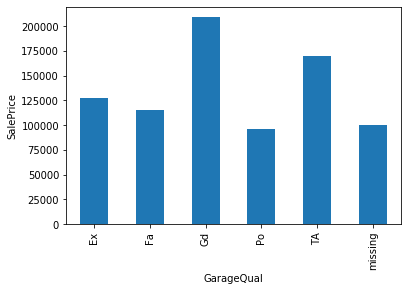

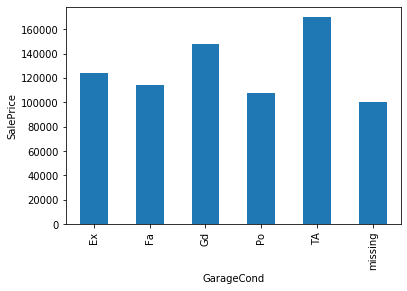

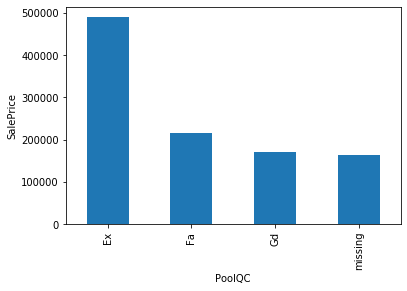

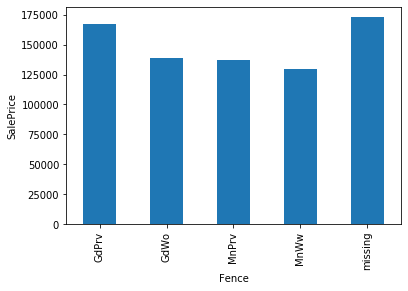

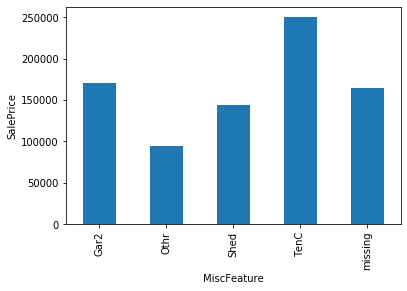

In [9]:
#no. of categories foreach feature
for feature in cat_feature:
    data=df.copy()
    data[feature] = np.where(data[feature].isnull(),'missing',data[feature])
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

In [10]:
#replace missing value by None for Alley feature
#df.loc[df['Alley'].isnull()]
df['Alley'].fillna('None',inplace=True)
df_test['Alley'].fillna('None',inplace=True)

In [11]:
#replace missing value by None for MasVnrType feature and zero for MasVnrArea 
df['MasVnrType'].fillna('None',inplace=True)
df['MasVnrArea'].fillna(0.0,inplace=True)
#test
df_test['MasVnrType'].fillna('None',inplace=True)
df_test['MasVnrArea'].fillna(0.0,inplace=True)

In [12]:
#BsmtQual(None),BsmtCond(None),BsmtExposure(None),BsmtFinType1(None),BsmtFinSF1(0),BsmtFinType2(None),BsmtFinSF2(0),BsmtUnfSF(0),TotalBsmtSF(0)
df['BsmtQual'].fillna('None',inplace=True)
df['BsmtCond'].fillna('None',inplace=True)
df['BsmtFinType1'].fillna('None',inplace=True)
df['BsmtFinType2'].fillna('None',inplace=True)
df['BsmtExposure'].fillna('None',inplace=True)
#test
df_test['BsmtQual'].fillna('None',inplace=True)
df_test['BsmtCond'].fillna('None',inplace=True)
df_test['BsmtFinType1'].fillna('None',inplace=True)
df_test['BsmtFinType2'].fillna('None',inplace=True)
df_test['BsmtExposure'].fillna('None',inplace=True)

In [13]:
#Electrical has single nan value, I replaced it by mode
#df.loc[df['Electrical'].isnull()]#id=1380 index 1379 drop
df['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)
df_test['Electrical'].fillna(df['Electrical'].mode()[0],inplace=True)

In [14]:
#FireplaceQu replace by 'None'
#df.loc[df['FireplaceQu'].isnull()]
df['FireplaceQu'].fillna('None',inplace=True)
#test
df_test['FireplaceQu'].fillna('None',inplace=True)

In [15]:
#GarageType(None),GarageFinish(None),GarageQual(None),GarageCond(None)
df['GarageType'].fillna('None',inplace=True)
df['GarageFinish'].fillna('None',inplace=True)
df['GarageQual'].fillna('None',inplace=True)
df['GarageCond'].fillna('None',inplace=True)
#test
df_test['GarageType'].fillna('None',inplace=True)
df_test['GarageFinish'].fillna('None',inplace=True)
df_test['GarageQual'].fillna('None',inplace=True)
df_test['GarageCond'].fillna('None',inplace=True)

In [16]:
#PoolQC(),Fence,MiscFeature
#df['PoolQC'].unique()
#df['Fence'].unique()
#df['MiscFeature'].unique()
df['PoolQC'].fillna('None',inplace=True)
df['Fence'].fillna('None',inplace=True)
df['MiscFeature'].fillna('None',inplace=True)
#test
df_test['PoolQC'].fillna('None',inplace=True)
df_test['Fence'].fillna('None',inplace=True)
df_test['MiscFeature'].fillna('None',inplace=True)

In [17]:
#year features
year_features = [feature for feature in df.columns if('Yr' in feature or 'Year' in feature)]

In [18]:
year_features_na = [feature for feature in year_features if df[feature].isnull().sum() > 0 ]

In [19]:
#year_features_na
#Feature GarageYrBlt has few null values, it means(assuming) these houses don't have Garage
#df.loc[df['GarageYrBlt'].isnull()]
#I am replacing null values by zero
df['GarageYrBlt'].fillna(0,inplace=True)
#test
df_test['GarageYrBlt'].fillna(0,inplace=True)

In [20]:
#get numerical features
numerical_features = [feature for feature in df.columns if(df[feature].dtypes != 'O')]# and feature not in year_features and feature not in 'Id')]

In [21]:
#get numerical features with null values
numerical_features_na = [feature for feature in numerical_features if( df[feature].isnull().sum()>0 )]# and feature not in year_features and feature not in 'Id')]

In [22]:
#df.loc[df['LotFrontage'].isnull()]
#df['LotFrontage'].hist(bins=50)
#replace null values by median because data is skewed
lot_frontage_median = df['LotFrontage'].median()
df['LotFrontage'] = np.where(df['LotFrontage'].isnull(),lot_frontage_median,df['LotFrontage'])
#test
test_lot_frontage_median = df_test['LotFrontage'].median()
df_test['LotFrontage'] = np.where(df_test['LotFrontage'].isnull(),test_lot_frontage_median,df_test['LotFrontage'])

In [23]:
#discrete features
discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 and feature not in year_features and feature not in 'Id']

In [24]:
#number of distinct values in each discrete feature 
for feat in discrete_features:
    print("{} has {} distinct values".format(feat,len(df[feat].unique())))

MSSubClass has 15 distinct values
OverallQual has 10 distinct values
OverallCond has 9 distinct values
LowQualFinSF has 24 distinct values
BsmtFullBath has 4 distinct values
BsmtHalfBath has 3 distinct values
FullBath has 4 distinct values
HalfBath has 3 distinct values
BedroomAbvGr has 8 distinct values
KitchenAbvGr has 4 distinct values
TotRmsAbvGrd has 12 distinct values
Fireplaces has 4 distinct values
GarageCars has 5 distinct values
3SsnPorch has 20 distinct values
PoolArea has 8 distinct values
MiscVal has 21 distinct values
MoSold has 12 distinct values


In [25]:
#find discrete feature with null values
discrete_features_na= [feature for feature in discrete_features if (df[feature].isnull().sum()>0)]

In [26]:
discrete_features_na
#No discrete feature has null values

[]

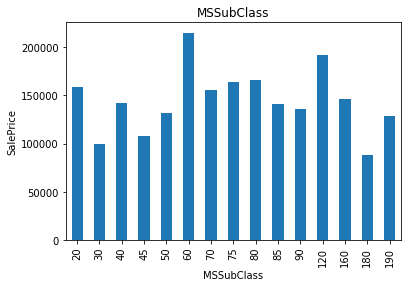

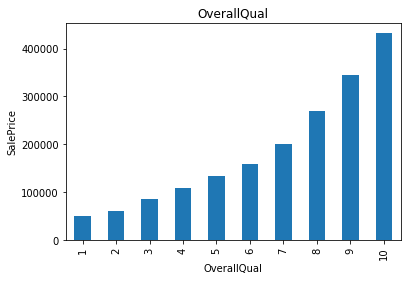

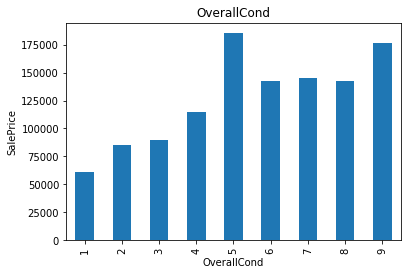

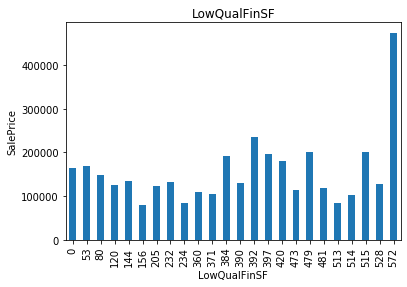

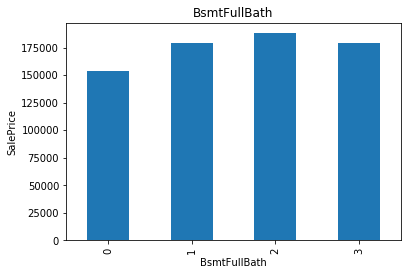

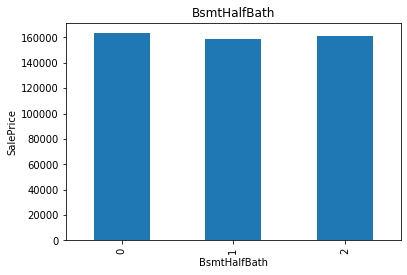

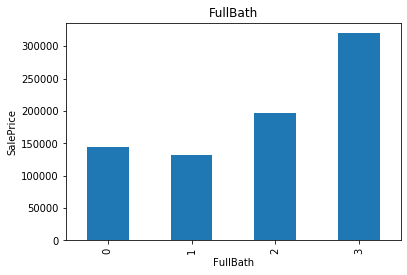

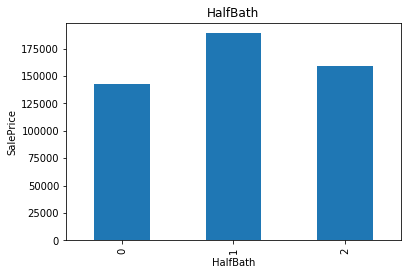

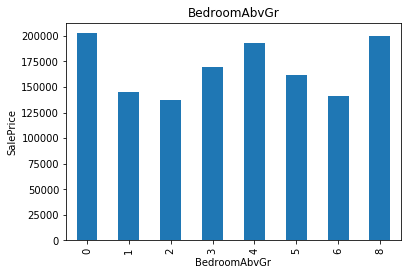

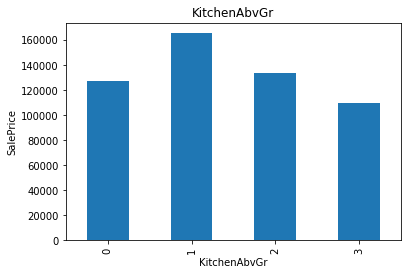

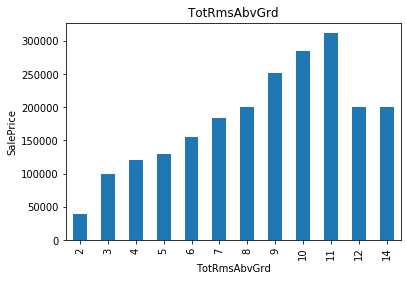

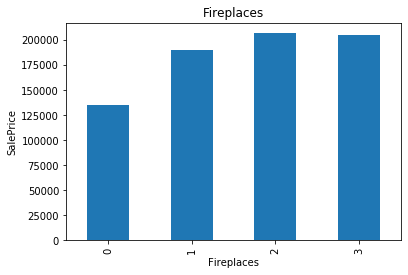

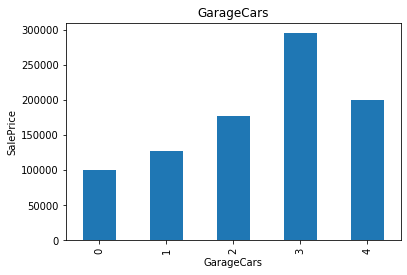

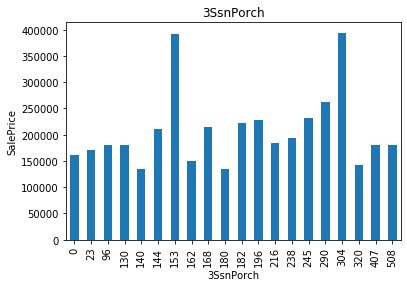

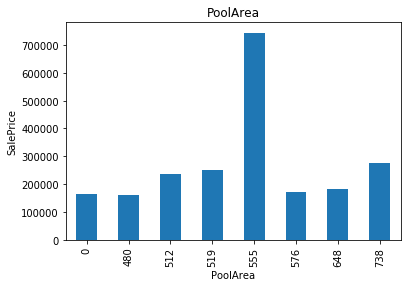

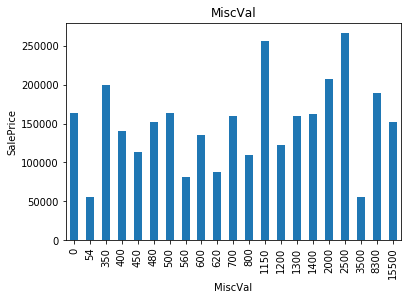

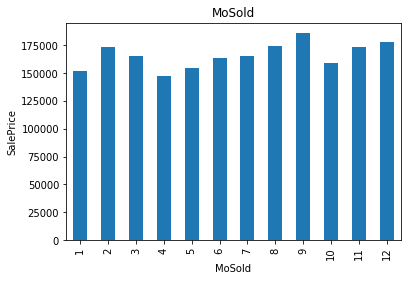

In [27]:
#display sales price for discrete feaTURE
for feat in discrete_features:
    data = df.copy()
    df.groupby(feat)['SalePrice'].median().plot.bar()
    plt.title(feat)
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

In [28]:
#continuous variable 
#create histogram for such variables
#find out the distribution for these variables
#if data is skewed for any variable, apply log transformation for such variables

continuous_features = [feat for feat in numerical_features if feat not in year_features + discrete_features+['Id']]


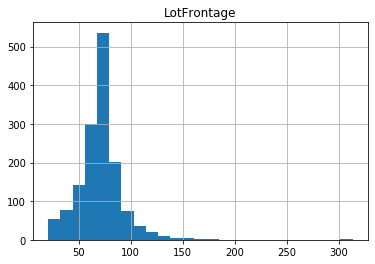

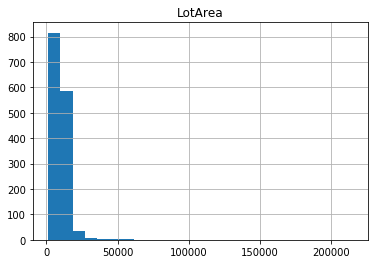

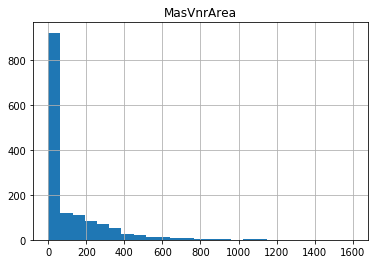

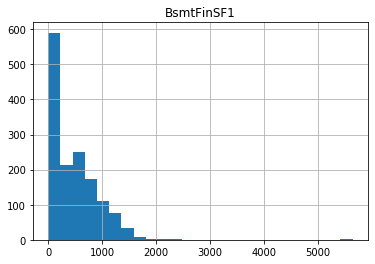

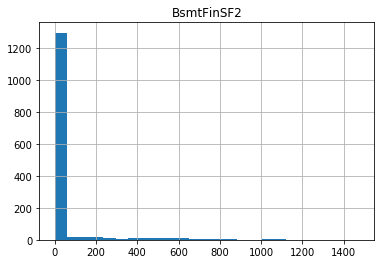

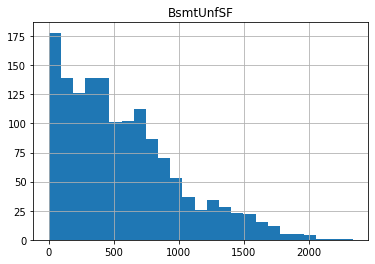

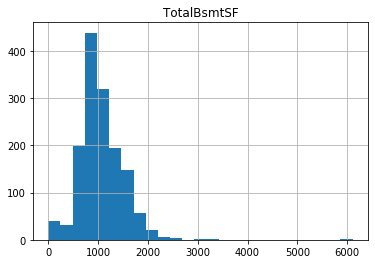

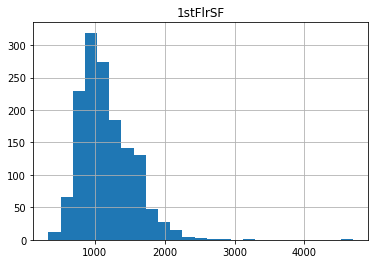

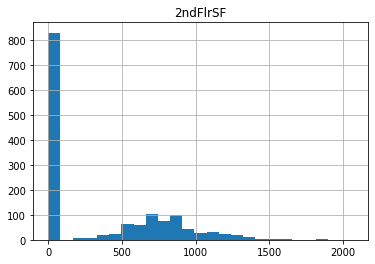

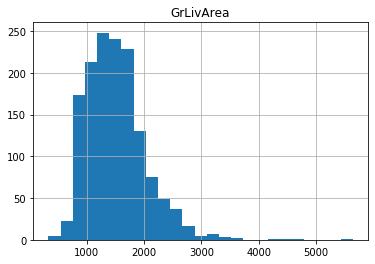

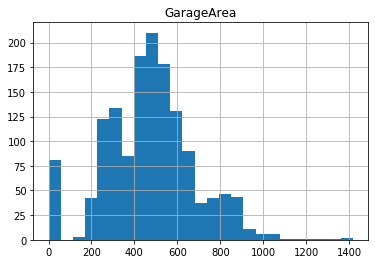

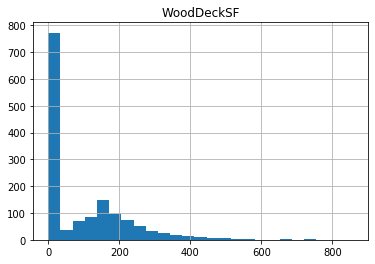

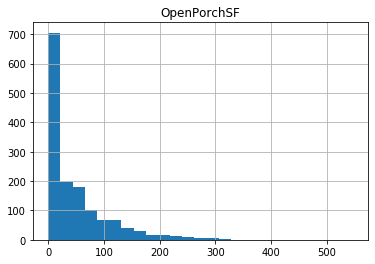

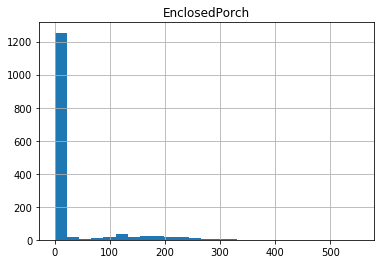

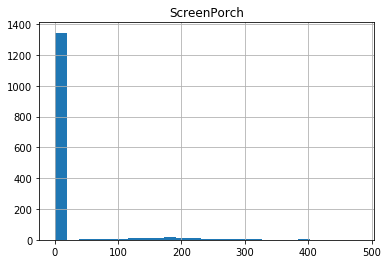

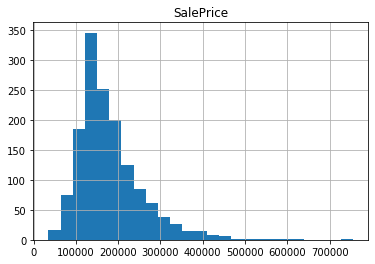

In [29]:
#plot histogram
for feat in continuous_features:
    data = df.copy()
    data[feat].hist(bins=25)
    plt.title(feat)
    plt.show()

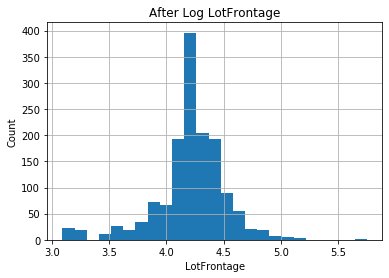

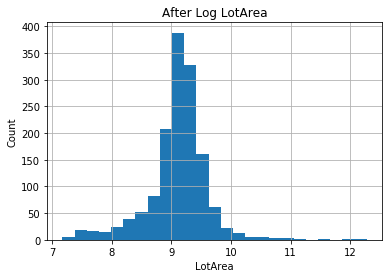

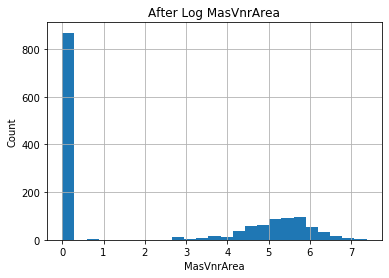

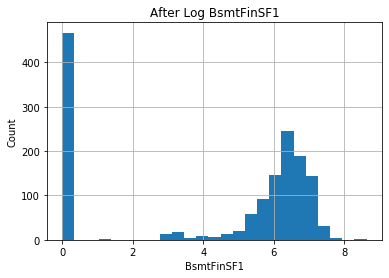

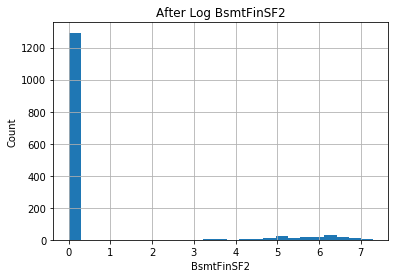

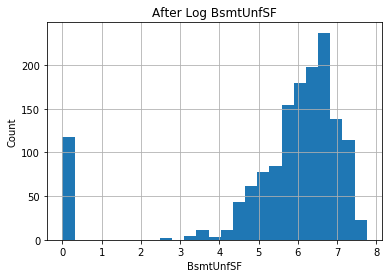

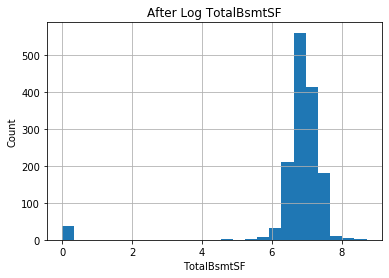

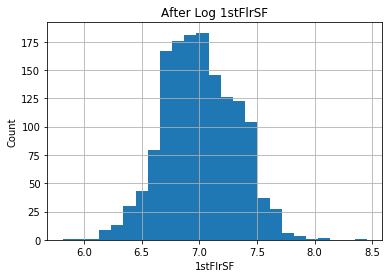

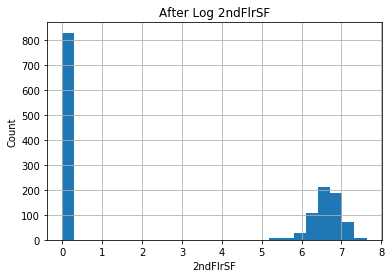

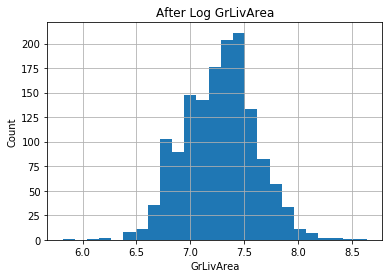

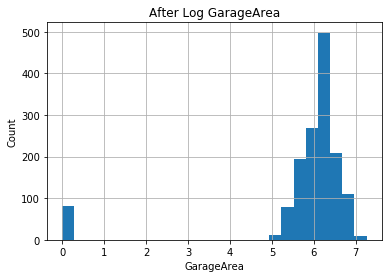

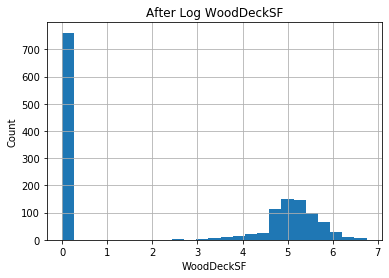

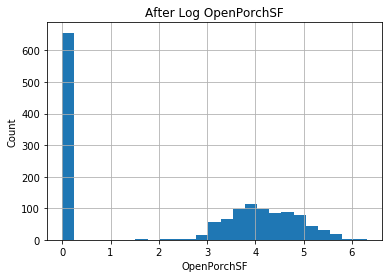

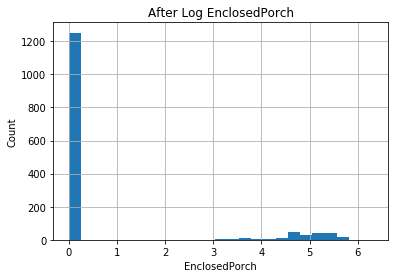

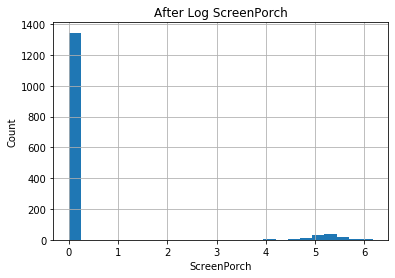

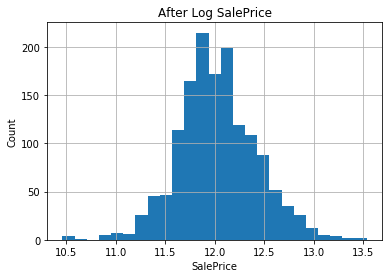

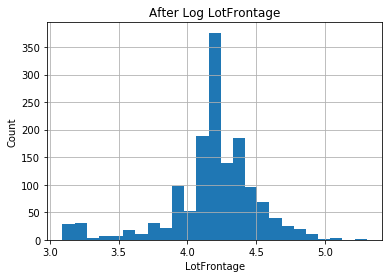

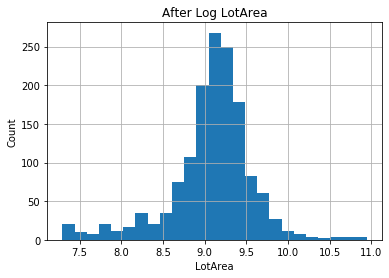

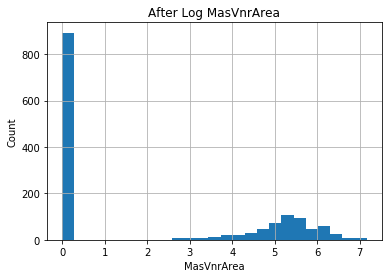

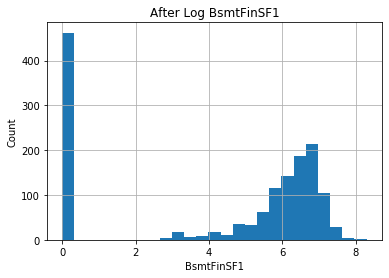

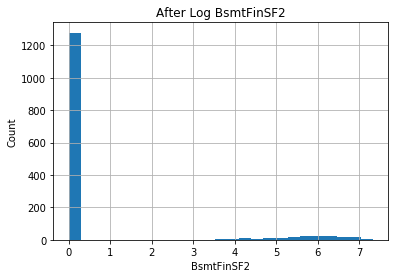

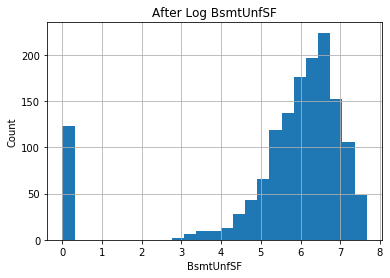

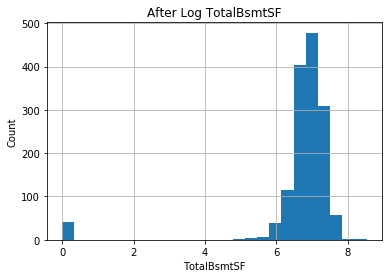

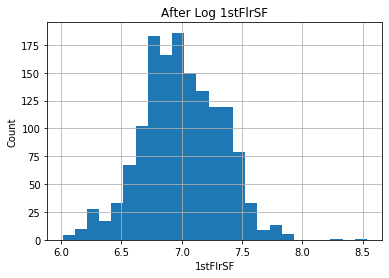

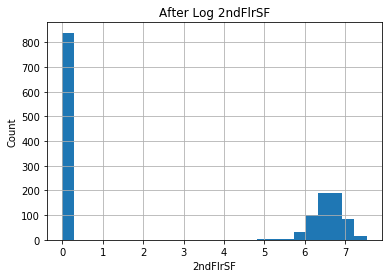

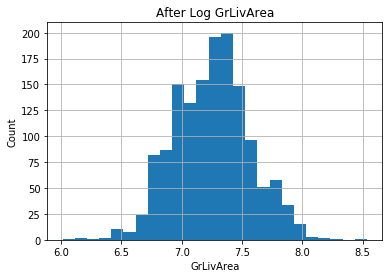

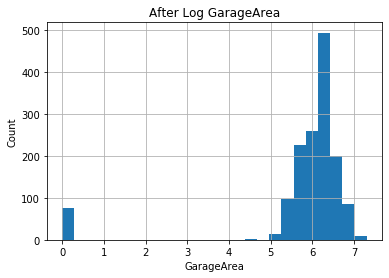

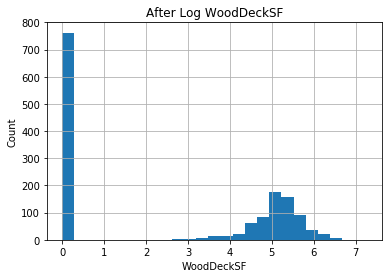

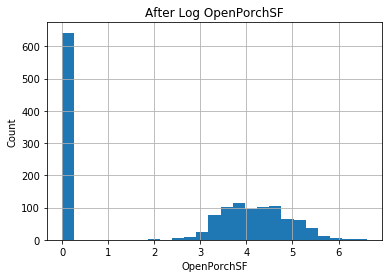

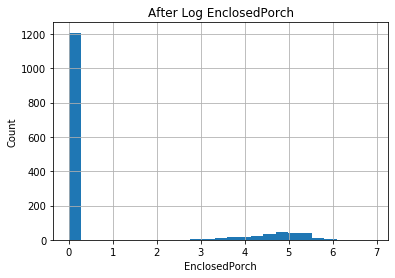

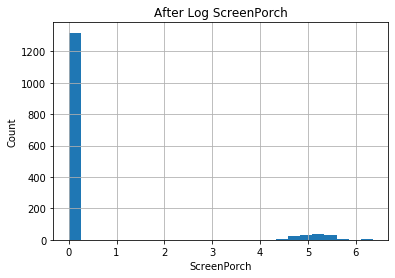

KeyError: 'SalePrice'

In [30]:
#perform log transformation
for feature in continuous_features:
    df[feature] = np.log1p(df[feature])
    df[feature].hist(bins=25)
    plt.title('After Log {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
#perform log transformation for test data
for feature in continuous_features:
    df_test[feature] = np.log1p(df_test[feature])
    df_test[feature].hist(bins=25)
    plt.title('After Log {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [ ]:
#find out outliers


In [33]:
#convert categorical feature to dummy values
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [34]:
#create dummy columns
dummy_columns = pd.get_dummies(df[cat_feature],drop_first=True)
#df_test
test_dummy_columns = pd.get_dummies(df_test[cat_feature],drop_first=True)

In [35]:
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [36]:
#drop categorical feature columns
#df.drop(columns=['Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'],axis=1)
x_data_set = df.drop(columns=cat_feature,axis=1)
x_test_data_set = df_test.drop(columns=cat_feature,axis=1)

In [37]:
#concat dummy columns with DF
x_data_set = pd.concat([x_data_set,dummy_columns],axis=1)
x_test_data_set = pd.concat([x_test_data_set,test_dummy_columns],axis=1)

In [38]:
x_data_set

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleConditi

In [40]:
y_data_set = x_data_set['SalePrice']
x_data_set = x_data_set.drop(columns=['Id','SalePrice'],axis=1)
#test
x_test_data_set = x_test_data_set.drop(columns=['Id'],axis=1)

In [114]:
#x_data_set.dtypes
y_data_set

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [41]:
#Create data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data_set,y_data_set,test_size=0.1,random_state=0)

In [42]:
#create model
regr = lm.LinearRegression()
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
regr.score(x_test,y_test)

0.8654263524624

In [44]:
#apply feature engineering for test set
regr.predict(x_test_data_set)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [49]:
x_test_data_set.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 241, dtype: int64